Whitney Humecky WJH190000

Ann Biju AXB190082


**2.1**

The following are the required pre-processing steps. Of course, you can add more as per your
requirements.

• Loading the data into Pandas DataFrame object. Remember to use public URLs to
read the file.

• Examining data for consistency: Check for null values, missing data, and any data
inconsistency and handle them before proceeding forward.

• Examining attributes and target variable(s): Be sure you clearly understand each of
the attributes and the target variable. Examine the various attributes and convert
any categorical ones to numerical ones, if needed. Obtain and output summary of the
attributes. Are the attributes normally distributed? If not, what could be the reason?

• Standardize and normalize the attributes.

• Find how the attributes are correlated to each other and the target variable. Perform
numerical and visual analysis and output plots and results.

• Identify a few important attributes and proceed forward. Do not use all attributes
blindly.

• Split the data into training and testing parts. The ratio is up to you.

# Preprocessing

In [ ]:
"""PREPROCESSING"""

import pandas as pd
import numpy as np
import seaborn as sn
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from sklearn import preprocessing

# fetch dataset and store in DataFrame
a = pd.read_csv("https://archive.ics.uci.edu/static/public/1/data.csv")

abalone = pd.DataFrame(a)
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# overview of dataset

# predicted variable = age (but we use 'rings' to determine age) [rings + 1.5 = age in years]
# sex is the only categorical variable

print(abalone.describe())

            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

In [ ]:
#checking if there are null values in the dataset - No Null Values
abalone.isnull()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


# **Normality**

The histogram for this dataset does not have a bell shaped curve, therefore it is not normally distributed.

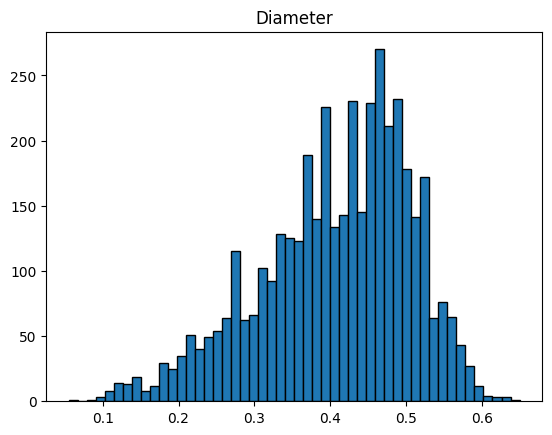

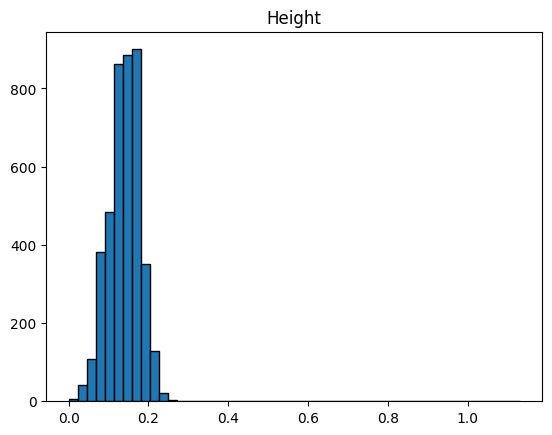

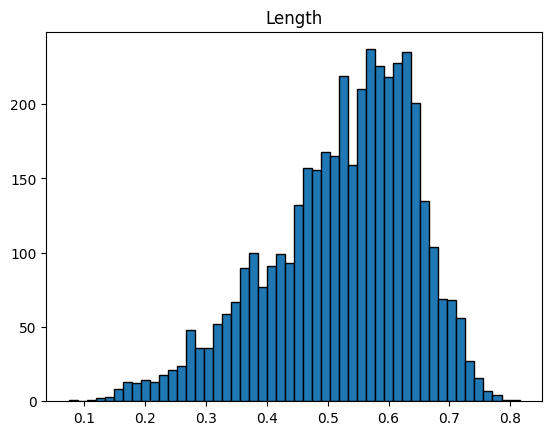

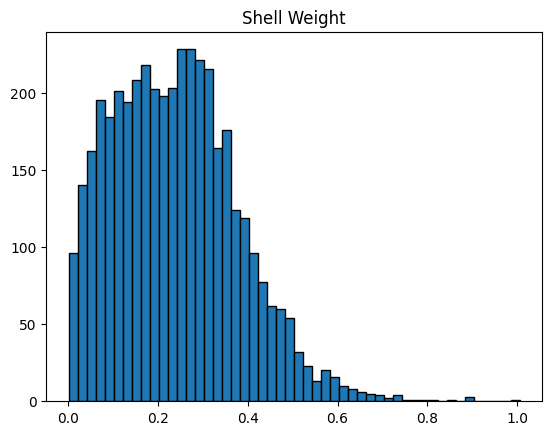

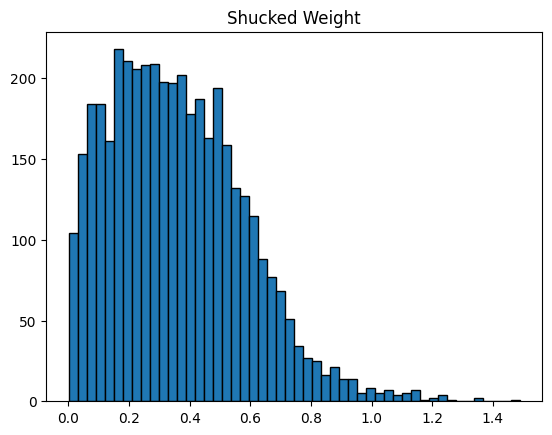

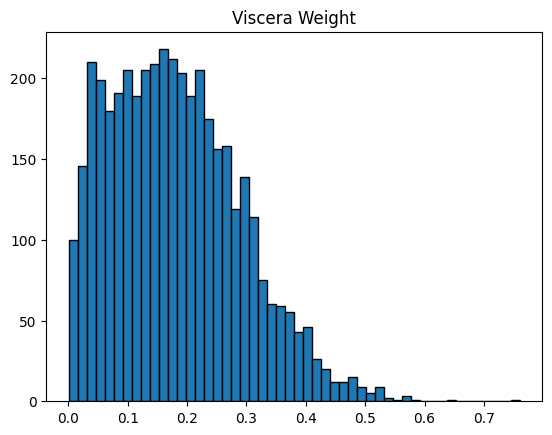

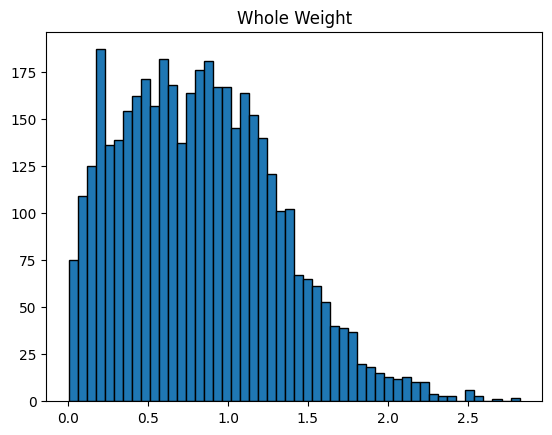

In [ ]:
# check if attributes are normally distributed -
#plt.hist(abalone, edgecolor = "black", bins = 30)


# Histograms of quantitative variables
plt.hist(abalone.Diameter, edgecolor = "black", bins = 50)
plt.title("Diameter")
plt.show()
plt.hist(abalone.Height, edgecolor = "black", bins = 50)
plt.title("Height")
plt.show()
plt.hist(abalone.Length, edgecolor = "black", bins = 50)
plt.title("Length")
plt.show()
plt.hist(abalone.Shell_weight, edgecolor = "black", bins = 50)
plt.title("Shell Weight")
plt.show()
plt.hist(abalone.Shucked_weight, edgecolor = "black", bins = 50)
plt.title("Shucked Weight")
plt.show()
plt.hist(abalone.Viscera_weight, edgecolor = "black", bins = 50)
plt.title("Viscera Weight")
plt.show()
plt.hist(abalone.Whole_weight, edgecolor = "black", bins = 50)
plt.title("Whole Weight")
plt.show()


# Normalize

In [ ]:
# Normalizing and scaling the dataset

#separate the abalone dataset
target = abalone.Rings
pred1 = abalone.Length
pred2 = abalone.Diameter
pred3 = abalone.Height
pred4 = abalone.Whole_weight
pred5 = abalone.Shucked_weight
pred6 = abalone.Viscera_weight
pred7 = abalone.Shell_weight
pred8 = abalone.Sex

#standardizing dependent variables
Length_norm = preprocessing.scale(pred1)
print(Length_norm)

Diam_norm = preprocessing.scale(pred2)
print(Diam_norm )

Height_norm = preprocessing.scale(pred3)
print(Height_norm)

Whole_W_norm = preprocessing.scale(pred4)
print(Whole_W_norm)

Shucked_W_norm = preprocessing.scale(pred5)
print(Shucked_W_norm)

Visceral_W_norm = preprocessing.scale(pred6)
print(Visceral_W_norm)

Shell_W_norm = preprocessing.scale(pred7)
print(Shell_W_norm)



# adding normalized attributes to a new dataframe
abalone_norm = pd.DataFrame()
abalone_norm['Rings'] = target
abalone_norm['Length'] = Length_norm
abalone_norm['Diameter'] = Diam_norm
abalone_norm['Height'] = Height_norm
abalone_norm['Whole_weight'] = Whole_W_norm
abalone_norm['Shucked_weight'] = Shucked_W_norm
abalone_norm['Viscera_weight'] = Visceral_W_norm
abalone_norm['Shell_weight'] = Shell_W_norm
abalone_norm['Sex'] = abalone['Sex'].where(abalone['Sex'] == 'Male', 1)
abalone_norm['Sex'] = abalone['Sex'].where(abalone['Sex'] == 'Female', 0)


abalone_norm.head()

[-0.57455813 -1.44898585  0.05003309 ...  0.6329849   0.84118198
  1.54905203]
[-0.43214879 -1.439929    0.12213032 ...  0.67640943  0.77718745
  1.48263359]
[-1.06442415 -1.18397831 -0.10799087 ...  1.56576738  0.25067161
  1.32665906]
[-0.64189823 -1.23027711 -0.30946926 ...  0.70821206  0.54199757
  2.28368063]
[-0.60768536 -1.17090984 -0.4634999  ...  0.74855917  0.77334105
  2.64099341]
[-0.72621157 -1.20522124 -0.35668983 ...  0.97541324  0.73362741
  1.78744868]
[-0.63821689 -1.21298732 -0.20713907 ...  0.49695471  0.41073914
  1.84048058]


,Rings,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex
0,15,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0
1,7,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0
2,9,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,0
3,10,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0
4,7,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,0


# Visualizations

<ipython-input-6-64ba3995b533>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = abalone_norm.corr()


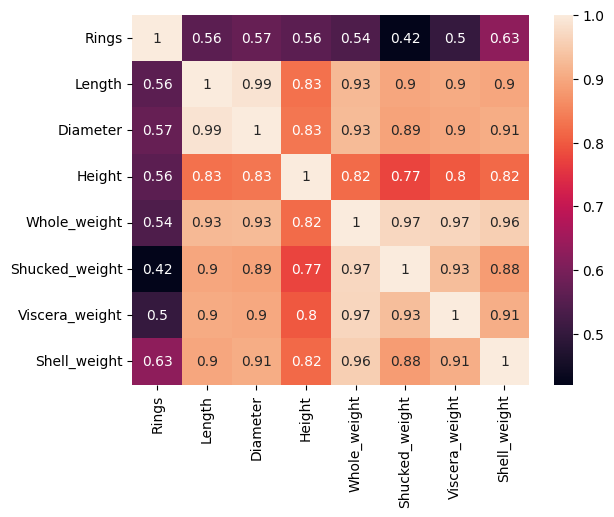

In [ ]:
# printing the correlation matrix of the normalized dataset
corr_matrix = abalone_norm.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

Target variable Rings has the strongest correlation with Shell Weight

Some visualizations

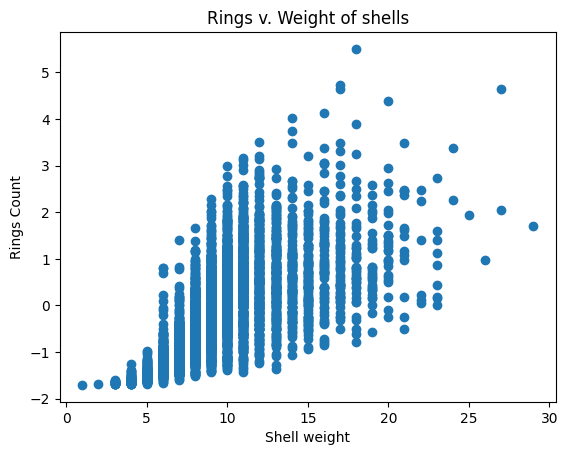

In [ ]:
plt.scatter(abalone_norm['Rings'], abalone_norm['Shell_weight'])
plt.title("Rings v. Weight of shells")
plt.xlabel("Shell weight")
plt.ylabel("Rings Count")
plt.show()

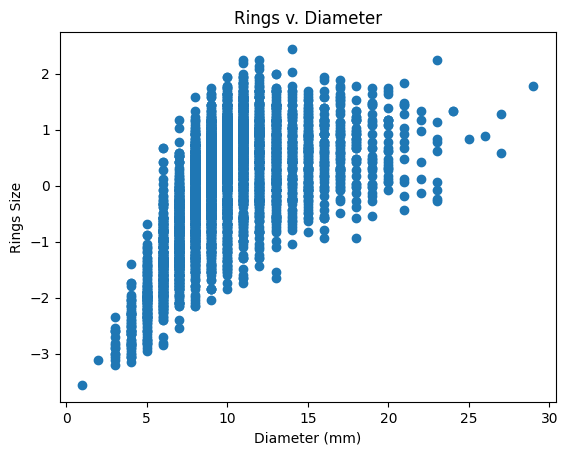

In [ ]:
plt.scatter(abalone_norm['Rings'], abalone_norm['Diameter'])
plt.title("Rings v. Diameter")
plt.xlabel("Diameter (mm)")
plt.ylabel("Rings Size")
plt.show()

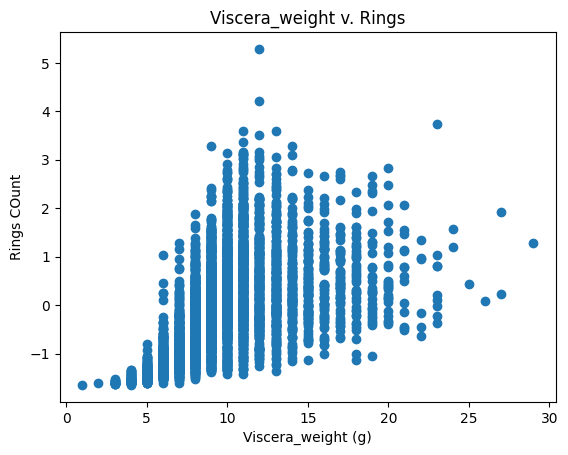

In [ ]:
plt.scatter(abalone_norm['Rings'], abalone_norm['Viscera_weight'])
plt.title("Viscera_weight v. Rings")
plt.xlabel("Viscera_weight (g)")
plt.ylabel("Rings COunt")
plt.show()

# Split data into Test and Train sections

In [ ]:
"""SPLIT DATA"""
from sklearn import model_selection

# data (as pandas dataframes)
X = abalone_norm.iloc[:,1:9]
y = abalone_norm['Rings']


xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.15)



2.2 Model Construction
As stated earlier, you need to create two types of models using SGDRegressor library of
Scikit-Learn and OLS library of statsmodels.
For the SGDRegressor library, you are required to tune the various hyper-parameters
such as learning rate, maximum iterations, loss, penalty, etc. Make sure to keep track of the
hyper-parameters used and results obtained. Do not just use all default values. You would
need to figure out which combination of hyper-parameters works best for your dataset. Be
sure to output as many result metrics as possible such as training and test error and accuracy,
R-squared statistic, etc.
For the OLS library of statsmodels, you will need to output the model summary and
interpret and explain all of the output diagnostics, such as coef, standard error, t-value,
p-value, R-squared, R-squared adjusted, F-statistic, etc.

# 1. Stochastic Gradient Descent using SGDRegressor library of Scikit-learn.



In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score

sgdr = SGDRegressor()

sgdr.fit(xtrain, ytrain)

score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)


best_score = -float("inf")
best_model = None

for alpha in [0.0001, 0.001, 0.01]:
    for max_iter in [100, 500, 1000]:
        for learning_rate in ['constant', 'invscaling', 'adaptive']:
            for loss in ['squared_error', 'huber', 'epsilon_insensitive']:
                model = SGDRegressor(alpha=alpha, max_iter=max_iter, learning_rate=learning_rate, loss=loss, random_state=42)
                model.fit(xtrain, ytrain)
                y_pred = model.predict(xtest)
                r2 = r2_score(ytest, y_pred)

                if r2 > best_score:
                    best_score = r2
                    best_model = model

# Print the best hyperparameters and results
print("Best Hyperparameters:", best_model.get_params())
print("Best R-squared:", best_score)



y_pred = best_model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

R-squared: 0.5341160940019445
Best Hyperparameters: {'alpha': 0.001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'loss': 'epsilon_insensitive', 'max_iter': 100, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best R-squared: 0.4325539938992575
Mean Squared Error: 5.683669011552723
Mean Absolute Error: 1.607652882206621
Root Mean Squared Error: 2.384044674823172
R-squared: 0.4325539938992575


# 2. Ordinary Linear Regression using the statsmodels library.

In [ ]:
!pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit regression model
results = smf.ols('Rings ~ Length+Diameter+Height+Whole_weight+Shucked_weight+Viscera_weight+Shell_weight+Sex', data=abalone_norm).fit()

# Inspect the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:50:44   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.9337      0.034    289.

# Test Regression without variables of correlation < 0.5

In [ ]:
from matplotlib.font_manager import X11FontDirectories
"""SPLIT DATA"""
from sklearn import model_selection

# data (as pandas dataframes)
X2 = pd.DataFrame()
X2['Rings'] = target
X2['Length'] = Length_norm
X2['Diameter'] = Diam_norm
X2['Height'] = Height_norm
X2['Whole_weight'] = Whole_W_norm
X2['Viscera_weight'] = Visceral_W_norm
X2['Shell_weight'] = Shell_W_norm
X2['Sex'] = abalone['Sex'].where(abalone['Sex'] == 'Male', 1)
X2['Sex'] = abalone['Sex'].where(abalone['Sex'] == 'Female', 0)
y = abalone_norm['Rings']


xtrain2, xtest2, ytrain, ytest = model_selection.train_test_split(X2, y, test_size=0.15)



In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

sgdr = SGDRegressor()

sgdr.fit(xtrain2, ytrain)

score = sgdr.score(xtrain2, ytrain)
print("R-squared:", score)

R-squared: 0.999995804319884


In [ ]:
!pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit regression model
results = smf.ols('Rings ~ Length+Diameter+Height+Whole_weight+Viscera_weight+Shell_weight+Sex', data=abalone_norm).fit()

# Inspect the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     590.4
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:51:06   Log-Likelihood:                -9532.0
No. Observations:                4177   AIC:                         1.908e+04
Df Residuals:                    4170   BIC:                         1.912e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.9337      0.037    270.

# Analysis:
For the OLS library of statsmodels, you will need to output the model summary and interpret and explain all of the output diagnostics, such as coef, standard error, t-value, p-value, R-squared, R-squared adjusted, F-statistic, etc.